In [2]:
import DifferentialEquations as DE
import ModelingToolkit as MTK
import Plots
import ModelingToolkit: t_nounits as t, D_nounits as D, @variables, @parameters, @named, @mtkbuild, @register_symbolic

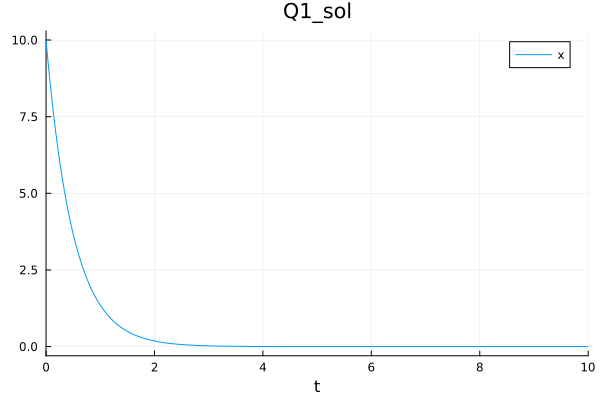

In [97]:
# Q1. MTK ver
@variables x(t) = 10
@parameters a = 2
eqs = [
    D(x) ~ -a*x
]
@mtkbuild sys = MTK.ODESystem(eqs, t)

# Convert from a symbolic to a numerical problem to simulate
tspan = (0.0, 10.0)
prob = DE.ODEProblem(sys, [], tspan)

# Solve the ODE
sol = DE.solve(prob)

# Plot the solution
Plots.plot(sol, title = "Q1_sol")

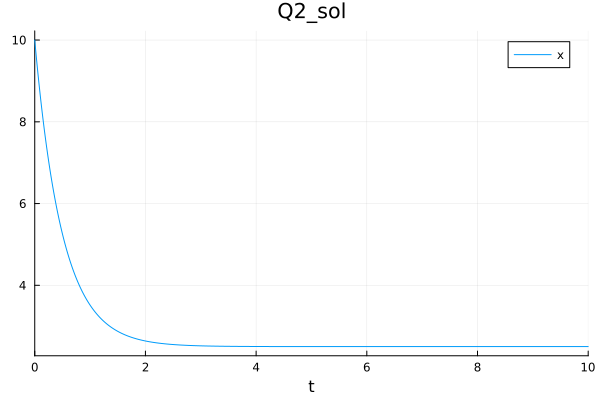

In [98]:
# Q2. MTK ver
@variables x(t) = 10
@parameters a = 2 b = 5
eqs = [
    D(x) ~ -a*x + b
]
@mtkbuild sys = MTK.ODESystem(eqs, t)

# Convert from a symbolic to a numerical problem to simulate
tspan = (0.0, 10.0)
prob = DE.ODEProblem(sys, [], tspan)

# Solve the ODE
sol = DE.solve(prob)

# Plot the solution
Plots.plot(sol, title = "Q2_sol")

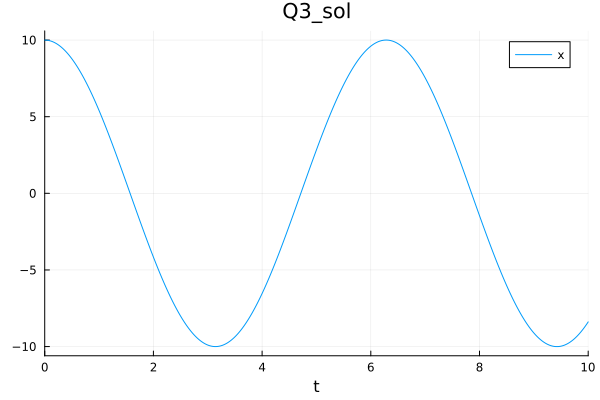

In [99]:
# Q3. MTK ver
@variables x(t) = 10 xdot(t) = 0
@parameters a = 1
eqs = [
    xdot ~ D(x),
    D(xdot) ~ -a*x
]
@mtkbuild sys = MTK.ODESystem(eqs, t)

# Convert from a symbolic to a numerical problem to simulate
tspan = (0.0, 10.0)
prob = DE.ODEProblem(sys, [], tspan)

# Solve the ODE
sol = DE.solve(prob)

# Plot the solution
Plots.plot(sol, idxs = x, title = "Q3_sol")


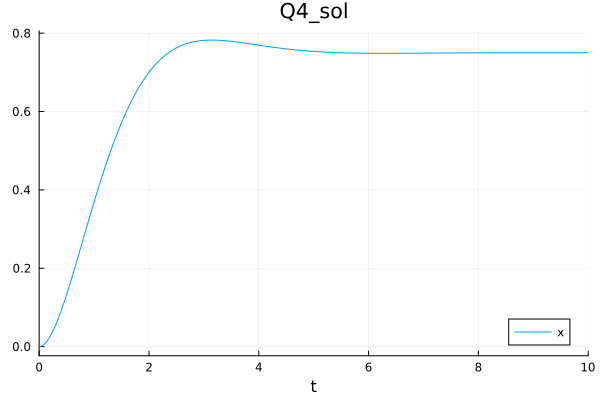

In [100]:
# Q4. MTK ver
@variables x(t) = 0 xdot(t) = 0
@parameters m = 2 c = 4 k = 4 u = 3
eqs = [
    xdot ~ D(x),
    m*D(xdot) + c*xdot + k*x ~ u
]
@mtkbuild sys = MTK.ODESystem(eqs, t)

# Convert from a symbolic to a numerical problem to simulate
tspan = (0.0, 10.0)
prob = DE.ODEProblem(sys, [], tspan)

# Solve the ODE
sol = DE.solve(prob)

# Plot the solution
Plots.plot(sol, idxs = x, title = "Q4_sol")

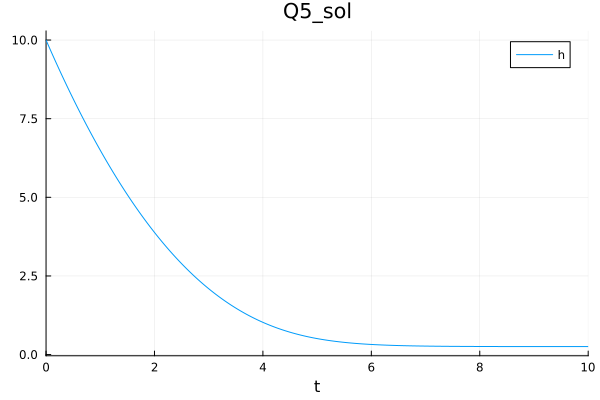

In [101]:
# Q5. MTK ver
@variables h(t) = 10 Q(t)
@parameters A = 12
@parameters α = 2 a = 4 g = 10 
@parameters u = 9
eqs = [
    Q ~ a*sqrt(α * g* h),
    A * D(h) ~ -Q + u
]
@mtkbuild sys = MTK.ODESystem(eqs, t)

# Convert from a symbolic to a numerical problem to simulate
tspan = (0.0, 10.0)
prob = DE.ODEProblem(sys, [], tspan)

# Solve the ODE
sol = DE.solve(prob)

# Plot the solution
Plots.plot(sol, title = "Q5_sol")

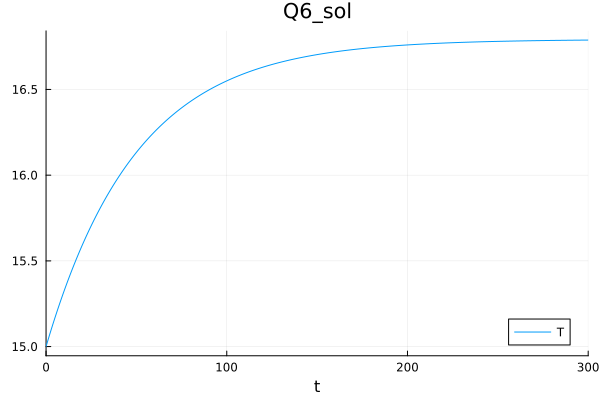

In [102]:
# Q6. MTK ver
@variables T(t) = 15
@parameters m = 20 mdot_f = 0.4 Cpmass= 4184
@parameters T_f = 15 Q_heater = 3000

eqs = [
    m * Cpmass * D(T) ~ mdot_f * Cpmass * (T_f - T) + Q_heater
]
@mtkbuild sys = MTK.ODESystem(eqs, t)

# Convert from a symbolic to a numerical problem to simulate
tspan = (0.0, 300.0)
prob = DE.ODEProblem(sys, [], tspan)

# Solve the ODE
sol = DE.solve(prob)

# Plot the solution
Plots.plot(sol, title = "Q6_sol")

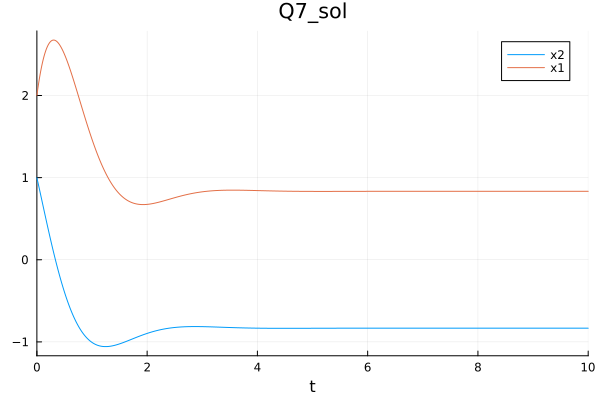

In [103]:
# Q7. MTK ver
@variables x1(t)= 2 x2(t)= 1
@parameters a11= -2 a12 = 4
@parameters a21= -1 a22 = -1
@parameters b1 = 5 b2 = 0 

eqs = [
    D(x1) ~ a11*x1 + a12*x2 + b1,
    D(x2) ~ a21*x1 + a22*x2 + b2
]
@mtkbuild sys = MTK.ODESystem(eqs, t)

# Convert from a symbolic to a numerical problem to simulate
tspan = (0.0, 10.0)
prob = DE.ODEProblem(sys, [], tspan)

# Solve the ODE
sol = DE.solve(prob)

# Plot the solution
Plots.plot(sol, title = "Q7_sol")

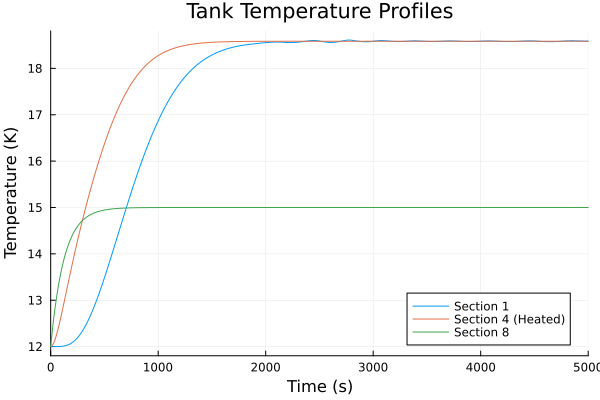

In [104]:
# Q8. MTK ver
function stratified_tank_problem(n; heat_source_loc=4, heat_source_val=3000.0)
    @variables T(t)[1:n] = 12 * ones(n)
    @parameters T_f = 15 mdot_f = 0.2 
    @parameters rho = 1000 Cpmass= 4184 k = 0.6
    @parameters V_tank = 0.2 h_tank = 1.6 A_tank = 0.125
    @parameters m = rho * V_tank / n
    @parameters Q[1:n] = [(i == heat_source_loc ? heat_source_val : 0.0) for i in 1:n]

    eqs = [
        m*Cpmass * D(T[i]) ~
            mdot_f * Cpmass * ( (i == 1 ? T_f : T[i-1]) - T[i] ) +
            (k / (h_tank / n)) * A_tank * ((i == 1 ? T_f : T[i-1]) + (i == n ? T[n] : T[i+1]) - 2 *T[i]) + Q[i]
        for i in 1:n
    ]

    @mtkbuild sys = MTK.ODESystem(eqs, t)
    return sys
end

function solve_tank_problem(; num_cv, num_source, heat_source_val, t_span)
    # Convert from a symbolic to a numerical problem to simulate
    sys = stratified_tank_problem(num_cv; heat_source_loc=num_source, heat_source_val=heat_source_val)
    prob = DE.ODEProblem(sys, [], t_span)
    # Solve the ODE
    return DE.solve(prob)
end


sol = solve_tank_problem(num_cv = 8,
                        num_source = 4,
                        heat_source_val = 3000.0, 
                        t_span = (0.0, 5000.0))

# Plot the solution
Plots.plot(sol,
    idxs = [1, 4, 8],  # 1번, 4번, 8번 변수(x1, x2, x3)를 플롯
    title = "Tank Temperature Profiles",
    label = ["Section 1" "Section 4 (Heated)" "Section 8"],
    xlabel = "Time (s)",
    ylabel = "Temperature (K)"
)